In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 14

In [4]:
# Carga e Descarga de Capacitores

## Resistor 1 k$\Omega$, capacitor 1000 $\mu$F

In [5]:
c1 = np.loadtxt('medidascapacitor/ALLSWDados_Capacitor_1k_1000microF.txt',delimiter=';')
x1, y1 = c1.T; x1 = np.array(x1) - 75

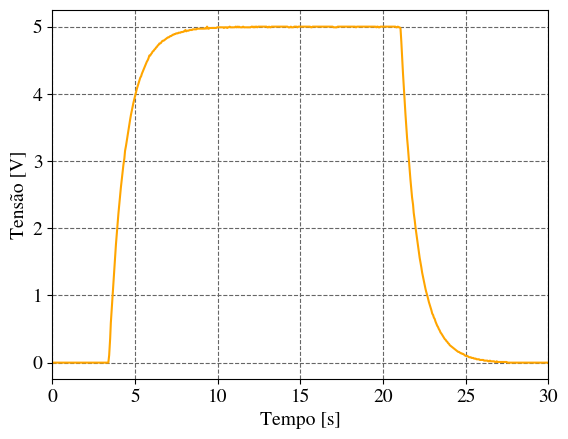

In [6]:
plt.plot(x1, y1, color='orange')
#plt.title(r'resistor 1 k$\Omega$, capacitor 1000 $\mu$F')
plt.xlim(0, 30) 
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40',ls='--',lw='0.8')
plt.savefig('c1.png',bbox_inches='tight')

In [7]:
plt.close()

- Quando Tensão = 0.63 (carga), t = 3.57
- Quando Tensão = 0.37 (descarga), t = 23.68

## Curvas de Carga e Descarga

Ajuste

- Carga: U*(1-exp(-(x-3.57)/RC)), sendo que o processo de carga se inicia em t = 3.4 e finaliza em t = 10.4

- Descarga: U*(exp(-(x-23.68)/RC)), processo de descarga inicia em t = 20.9 e finaliza em t = 26.15

In [8]:
# funções

def carga(U,cte,t,t0):
    return U*(1-(np.exp(-(t-t0)/cte)))
def RC(R,C):
    return R*C
def descarga(U,cte,t,t0):
    return U*(np.exp((-(t-t0)/cte)))


In [9]:
R1 = 1000; C = 1000e-6; cte1 = RC(R1,C)
cte1

1.0

In [10]:
# intervalos de tempo -- xc = xcarga, xd = xdescarga
xc1 = x1[1550:1700]; yc1 = y1[1550:1700]
xd1 = x1[1899:2000]; yd1 =  y1[1899:2000]
xc1 = xc1 - xc1[0]; xd1 = xd1 - xd1[0] # fazer com que x comece em 0

In [11]:
def carga(t, U, tau):
    return U * (1 - np.exp(-t / tau))
def descarga(t, U, tau):
    return U*(np.exp(-t/tau))

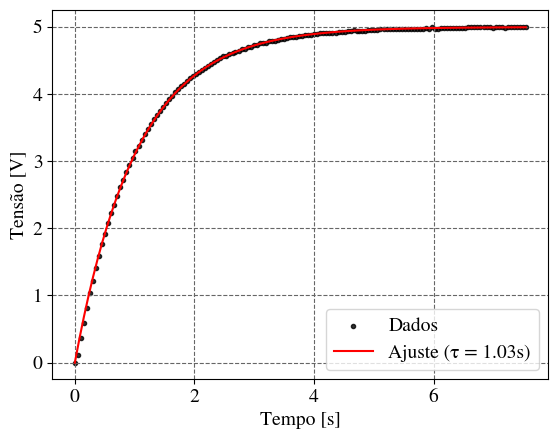

U = 4.9940 V
tau = 1.0329 $\pm$ 0.0028


In [12]:
# ajuste da curva
p0 = [max(yc1), 1]  # max(T), tau
popt, pcov = curve_fit(carga, xc1, yc1, p0=p0)

# parâmetros ajustados
U_ajustado, tau_ajustado = popt
tfit = np.linspace(xc1[0], xc1[-1], 100)
yfit = carga(tfit, U_ajustado, tau_ajustado)

plt.scatter(xc1, yc1, color='k', marker='.', label='Dados',alpha=0.8)
plt.plot(tfit, yfit, color='r', label=f'Ajuste (τ = {tau_ajustado:.2f}s)')
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40', ls='--', lw=0.8)
plt.savefig('ajuste_c1C.png',bbox_inches='tight')
plt.legend()
plt.show()
print(f"U = {U_ajustado:.4f} V")
sigma_tau = np.sqrt(pcov[1, 1]) 
print(f"tau = {tau_ajustado:.4f} $\pm$ {sigma_tau:.4f}")

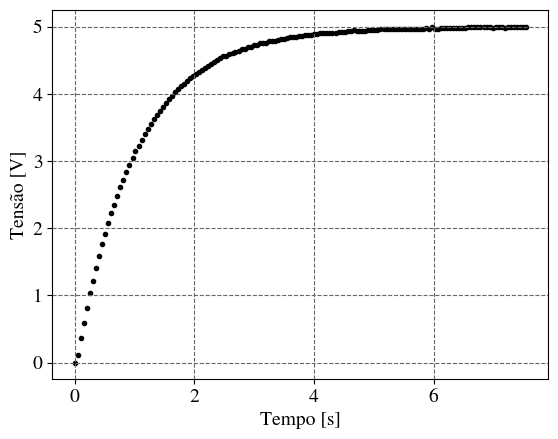

In [13]:
# carga solo
plt.scatter(xc1-xc1[0], yc1, color='k', marker='.')

#plt.plot(xc1-xc1[0], ajuste)
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40',ls='--',lw='0.8')
plt.savefig('carga_C1.png',bbox_inches='tight')

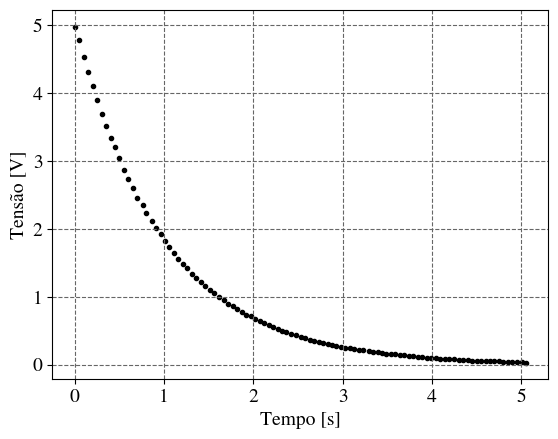

In [14]:
# descarga solo
plt.scatter(xd1-xd1[0], yd1, color='k', marker='.')

#plt.plot(xc1-xc1[0], ajuste)
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40',ls='--',lw='0.8')
plt.savefig('descarga_C1.png',bbox_inches='tight')

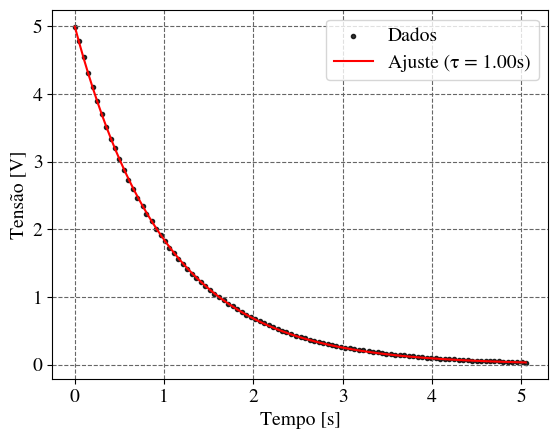

U = 4.9920 V, tau = 1.0042 s
tau = 1.004 $\pm$ 0.001


In [15]:
# ajuste
p0 = [max(yd1), 1]  # max(T), tau
popt, pcov = curve_fit(descarga, xd1, yd1, p0=p0)

# parâmetros ajustados
U_ajustado, tau_ajustado = popt
tfit = np.linspace(xd1[0], xd1[-1], 100)
yfit = descarga(tfit, U_ajustado, tau_ajustado)

plt.scatter(xd1, yd1, color='k', marker='.', label='Dados',alpha=0.8)
plt.plot(tfit, yfit, color='r', label=f'Ajuste (τ = {tau_ajustado:.2f}s)')
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40', ls='--', lw=0.8)
plt.savefig('ajuste_c1D.png',bbox_inches='tight')
plt.legend()
plt.show()
print(f"U = {U_ajustado:.4f} V, tau = {tau_ajustado:.4f} s")
sigma_tau = np.sqrt(pcov[1, 1]) 
print(f"tau = {tau_ajustado:.3f} $\pm$ {sigma_tau:.3f}")

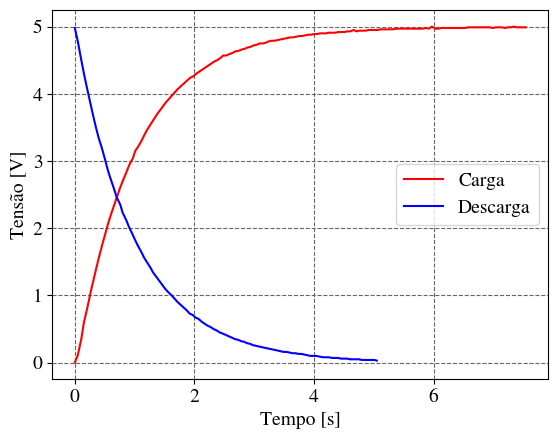

In [16]:
# plot da carga e descarga um sobre o outro
plt.plot(xc1-xc1[0], yc1, color='red',label='Carga')
plt.plot(xd1-xd1[0], yd1, color='blue',label='Descarga',)
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.legend(loc=5,fancybox=True)
plt.grid(axis='both', color='0.40',ls='--',lw='0.8')
plt.savefig('c1_cargaedescarga.png',bbox_inches='tight')

## Resistor 2,2 k$\Omega$, capacitor 1000 $\mu$F

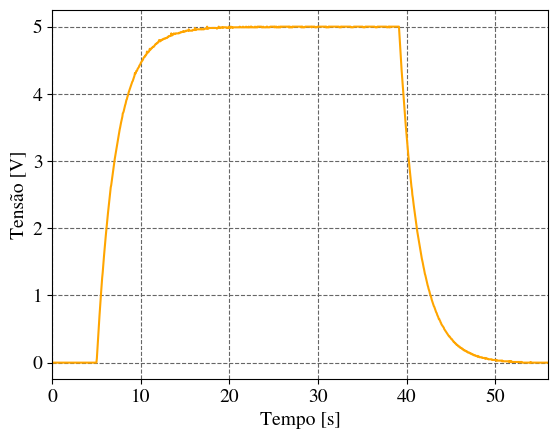

In [17]:
c2 = np.loadtxt('medidascapacitor/ALLSWDados_Capacitor_2.2k_1000microF.txt',delimiter=';').T
x2, y2 = c2; x2 = np.array(x2) - 50
plt.plot(x2, y2, color='orange')
#plt.title(r'resistor 2,2 k$\Omega$, capacitor 1000 $\mu$F')
plt.xlim(0, 56)
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40',ls='--',lw='0.8')
plt.savefig('c2.png',bbox_inches='tight')

In [18]:
plt.close()

In [19]:
R2 = 2200; cte2 = RC(R2, C)
cte2

2.2

In [20]:
xc2 = x2[1086:1425]; yc2 = y2[1086:1425]
xd2 = x2[1760:2065]; yd2 =  y2[1760:2065]
xc2 = xc2 - xc2[0]; xd2 = xd2 - xd2[0]

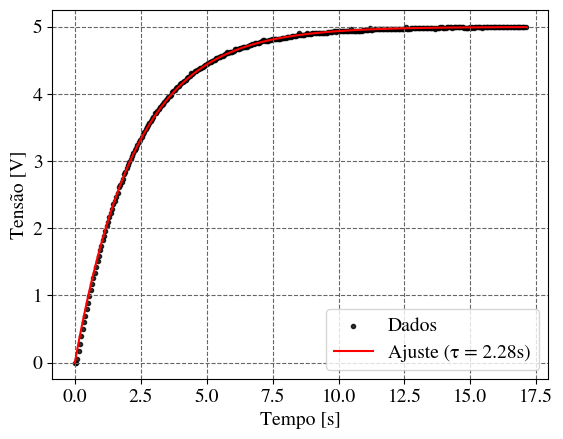

U = 4.9961 V, tau = 2.2848 s
tau = 2.285 $\pm$ 0.004


In [21]:
# ajuste
p0 = [max(yc2), 2.2]  # max(T), tau
popt, pcov = curve_fit(carga, xc2, yc2, p0=p0)

# parâmetros ajustados
U_ajustado, tau_ajustado = popt
tfit = np.linspace(xc2[0], xc2[-1], 100)
yfit = carga(tfit, U_ajustado, tau_ajustado)

plt.scatter(xc2, yc2, color='k', marker='.', label='Dados',alpha=0.8)
plt.plot(tfit, yfit, color='r', label=f'Ajuste (τ = {tau_ajustado:.2f}s)')
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40', ls='--', lw=0.8)
plt.savefig('ajuste_c2C.png',bbox_inches='tight')
plt.legend()
plt.show()
print(f"U = {U_ajustado:.4f} V, tau = {tau_ajustado:.4f} s")
sigma_tau = np.sqrt(pcov[1, 1]) 
print(f"tau = {tau_ajustado:.3f} $\pm$ {sigma_tau:.3f}")

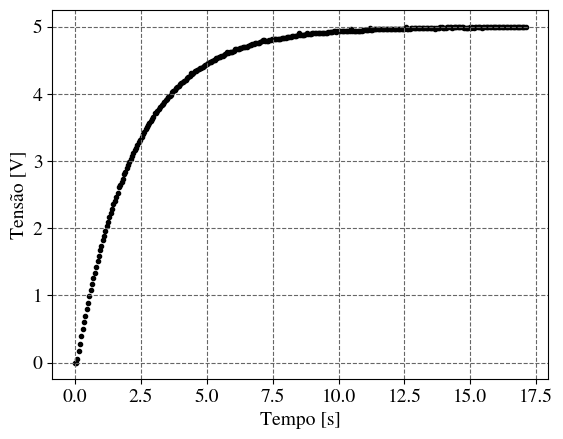

In [22]:
# carga solo
plt.scatter(xc2-xc2[0], yc2, color='k', marker='.')

#plt.plot(xc1-xc1[0], ajuste)
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40',ls='--',lw='0.8')
plt.savefig('carga_C2.png',bbox_inches='tight')

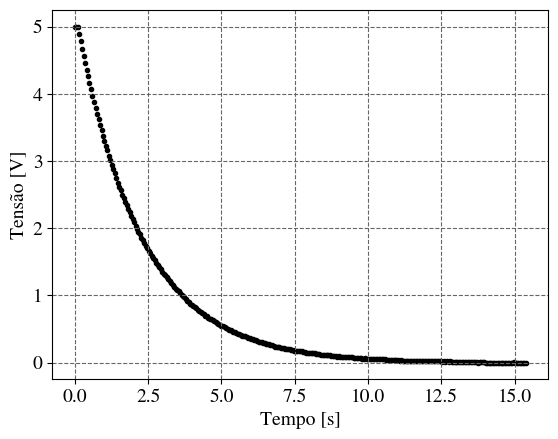

In [23]:
# descarga solo
plt.scatter(xd2-xd2[0], yd2, color='k', marker='.')

#plt.plot(xc1-xc1[0], ajuste)
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40',ls='--',lw='0.8')
plt.savefig('descarga_C2.png',bbox_inches='tight')

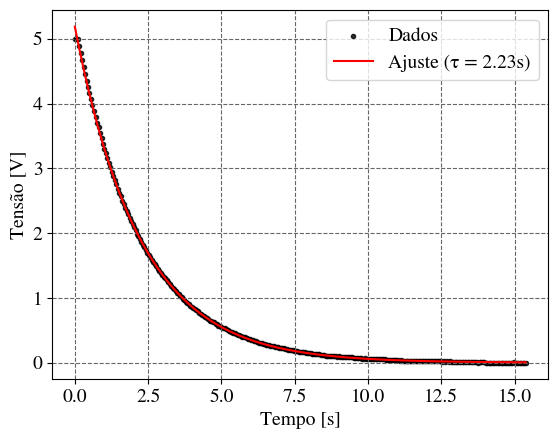

U = 5.1865 V, tau = 2.2276 s
tau = 2.228 $\pm$ 0.003


In [24]:
# ajuste
p0 = [max(yd2), 1]  # max(T), tau
popt, pcov = curve_fit(descarga, xd2, yd2, p0=p0)

# parâmetros ajustados
U_ajustado, tau_ajustado = popt
tfit = np.linspace(xd2[0], xd2[-1], 100)
yfit = descarga(tfit, U_ajustado, tau_ajustado)

plt.scatter(xd2, yd2, color='k', marker='.', label='Dados',alpha=0.8)
plt.plot(tfit, yfit, color='r', label=f'Ajuste (τ = {tau_ajustado:.2f}s)')
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40', ls='--', lw=0.8)
plt.savefig('ajuste_c2D.png',bbox_inches='tight')
plt.legend()
plt.show()
print(f"U = {U_ajustado:.4f} V, tau = {tau_ajustado:.4f} s")
sigma_tau = np.sqrt(pcov[1, 1]) 
print(f"tau = {tau_ajustado:.3f} $\pm$ {sigma_tau:.3f}")

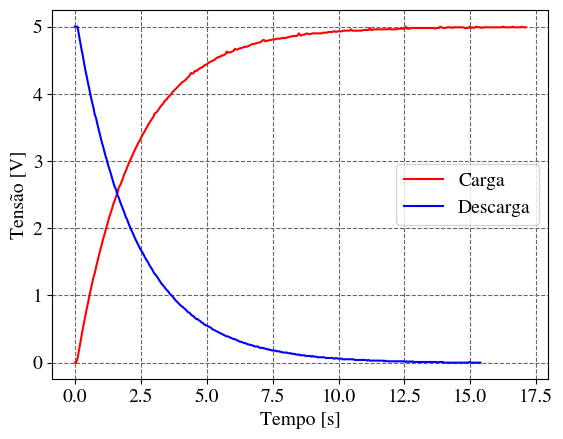

In [25]:
# plot da carga e descarga um sobre o outro
plt.plot(xc2-xc2[0],yc2, color='red',label='Carga')
plt.plot(xd2-xd2[0],yd2, color='blue',label='Descarga')
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.legend()
plt.grid(axis='both', color='0.40',ls='--',lw='0.8')
plt.savefig('c2_cargaedescarga.png',bbox_inches='tight')

In [26]:
plt.close()

## Resistor 4,7 k$\Omega$, capacitor 1000 $\mu$F


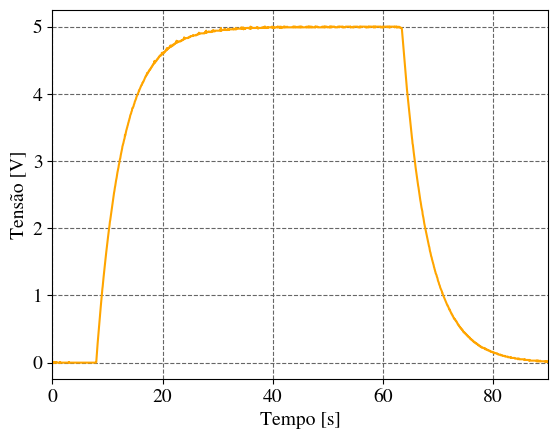

In [27]:
c3 = np.loadtxt('medidascapacitor/ALLSWDados_Capacitor_4.7k_1000microF.txt',delimiter=';')
x3, y3 = c3.T; x3 = np.array(x3) - 90
plt.plot(x3, y3,color='orange')
#plt.title(r'resistor 4,7 k$\Omega$, capacitor 1000 $\mu$F')
plt.xlim(0, 90)
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40',ls='--',lw='0.8')
plt.savefig('c3.png',bbox_inches='tight')

In [28]:
plt.close()

In [29]:
R3 = 4700; cte3 = RC(R3, C)
cte3

4.7

In [30]:
xc3 = x3[1935:2600]; yc3 = y3[1935:2600]
xd3 = x3[3040:3700]; yd3 =  y3[3040:3700]
xc3 = xc3-xc3[0]; xd3=xd3-xd3[0]

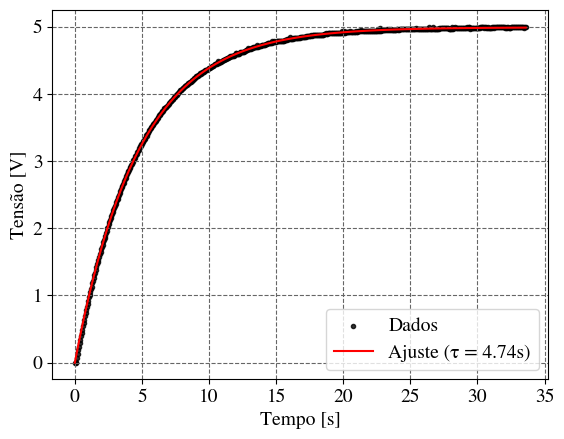

U = 4.9894 V, tau = 4.7377 s
tau = 4.738 $\pm$ 0.003


In [31]:
# ajuste
p0 = [max(yc2), 4.7]  # max(T), tau
popt, pcov = curve_fit(carga, xc3, yc3, p0=p0)

# parâmetros ajustados
U_ajustado, tau_ajustado = popt
tfit = np.linspace(xc3[0], xc3[-1], 100)
yfit = carga(tfit, U_ajustado, tau_ajustado)

plt.scatter(xc3, yc3, color='k', marker='.', label='Dados',alpha=0.8)
plt.plot(tfit, yfit, color='r', label=f'Ajuste (τ = {tau_ajustado:.2f}s)')
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40', ls='--', lw=0.8)
plt.savefig('ajuste_c3C.png',bbox_inches='tight')
plt.legend()
plt.show()
print(f"U = {U_ajustado:.4f} V, tau = {tau_ajustado:.4f} s")
sigma_tau = np.sqrt(pcov[1, 1]) 
print(f"tau = {tau_ajustado:.3f} $\pm$ {sigma_tau:.3f}")

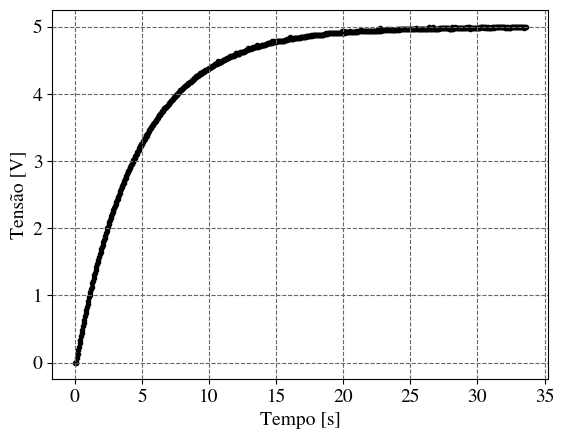

In [32]:
# carga solo
plt.scatter(xc3-xc3[0], yc3, color='k', marker='.')

#plt.plot(xc1-xc1[0], ajuste)
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40',ls='--',lw='0.8')
plt.savefig('carga_C3.png',bbox_inches='tight')

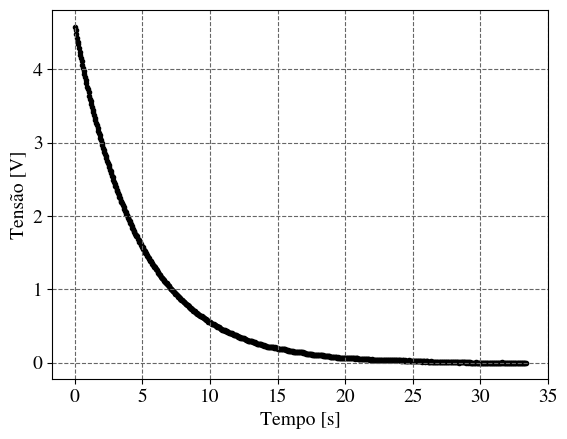

In [33]:
# descarga solo
plt.scatter(xd3-xd3[0], yd3, color='k', marker='.')

#plt.plot(xc1-xc1[0], ajuste)
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40',ls='--',lw='0.8')
plt.savefig('descarga_C3.png',bbox_inches='tight')

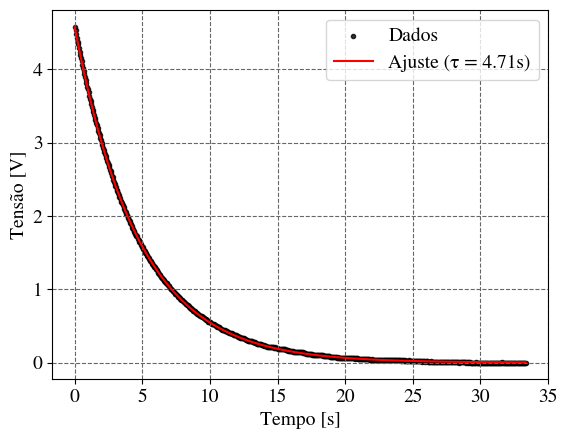

U = 4.5697 V, tau = 4.7053 s
tau = 4.705 $\pm$ 0.002


In [34]:
# ajuste
p0 = [max(yd3), 1]  # max(T), tau
popt, pcov = curve_fit(descarga, xd3, yd3, p0=p0)

# parâmetros ajustados
U_ajustado, tau_ajustado = popt
tfit = np.linspace(xd3[0], xd3[-1], 100)
yfit = descarga(tfit, U_ajustado, tau_ajustado)

plt.scatter(xd3, yd3, color='k', marker='.', label='Dados',alpha=0.8)
plt.plot(tfit, yfit, color='r', label=f'Ajuste (τ = {tau_ajustado:.2f}s)')
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.grid(axis='both', color='0.40', ls='--', lw=0.8)
plt.savefig('ajuste_c3D.png',bbox_inches='tight')
plt.legend()
plt.show()
print(f"U = {U_ajustado:.4f} V, tau = {tau_ajustado:.4f} s")
sigma_tau = np.sqrt(pcov[1, 1]) 
print(f"tau = {tau_ajustado:.3f} $\pm$ {sigma_tau:.3f}")

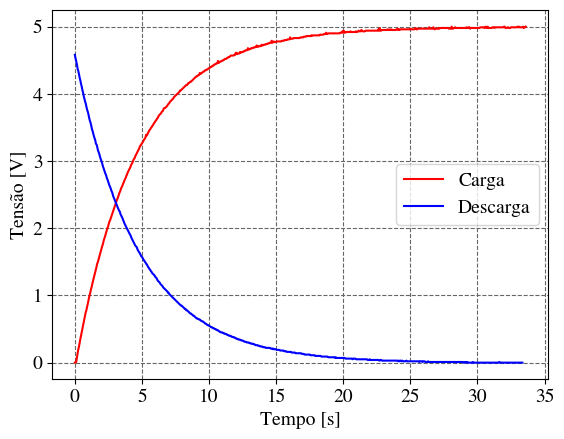

In [35]:
# plot da carga e descarga um sobre o outro
plt.plot(xc3-xc3[0],yc3, color='red',label='Carga')
plt.plot(xd3-xd3[0],yd3, color='blue',label='Descarga')
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.legend()
plt.grid(axis='both', color='0.40',ls='--',lw='0.8')
plt.savefig('c3_cargaedescarga.png',bbox_inches='tight')

In [36]:
plt.close()

2. Determine no gráfico os valores da constante de tempo ($\tau$) de cada
circuito, tanto pelos pontos de 63% da tensão total (nas curvas de carga)
e de 37% da tensão total (nas curvas de descarga), quanto por dados
obtidos de ajustes feitos utilizando as equações de carga e descarga. Nos
ajustes, deverão ser utilizadas as Equações 9 e 14 e o aluno deverá usar
o modo de ajuste livre do programa para introduzir as equações,
informando inclusive o valor da tensão máxima e do tempo inicial. Este
tempo inicial (t0) é o tempo em que foi iniciado o processo de carga ou de
descarga. São, portanto, tempos diferentes para cada curva. Estes
tempos iniciais devem ser descontados também dos valores de tempo
determinados pelos pontos de 63% da tensão total (nas curvas de carga)
e de 37% da tensão total (nas curvas de descarga). Preencha a Tabela 1.

Eq 8
$$
    V_R = V\cdot (e^{\frac{-(t-t_0)}{\tau}})
$$
Eq 9
$$
    V_C = V - V_R = V\cdot (1 - e^{\frac{-(t-t_0)}{\tau}})
$$
Eq 14
$$
    V_C = V \cdot e^{{\frac{-(t-t_0)}{\tau}}}
$$

Determinar $\tau$ (= RC) para 63% da tensão total (carga) e 37% da tensão total (descarga).

Ajuste (vídeo do Marcelo Macedo) 

Carga: U*(1-exp(-(x-25.525)/RC))

Descarga: U*(exp(-(x-53.92)/RC))

# Lei de Ampère

In [37]:
ampere1 = np.loadtxt('ampere1.txt',delimiter=';')
ampere2 = np.loadtxt('ampere2.txt',delimiter=';')
d1, b1 = ampere1.T; d2, b2 = ampere2.T

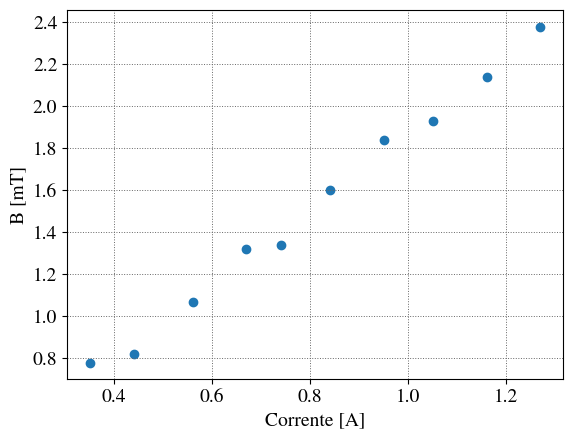

In [38]:
plt.scatter(d1, b1)
#plt.plot(b1,d1,alpha=0.5)
plt.xlabel('Corrente [A]')
plt.ylabel('B [mT]')
plt.grid(axis='both', color='0.40',ls=':',lw='0.5')
plt.grid(axis='both', color='0.40',ls=':',lw='0.7')
plt.savefig('ap1.png',bbox_inches='tight')

In [39]:
# salvar arquivo
plt.close()

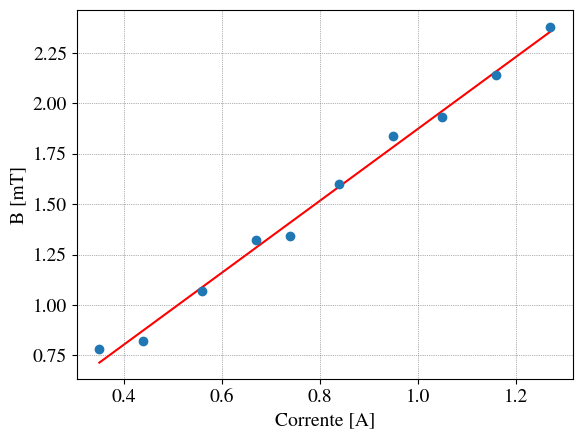

In [40]:
# ajuste linear
coef = np.polyfit(d1, b1, 1)
fx = np.poly1d(coef)
plt.scatter(d1, b1,label='Medidas',zorder=2)
plt.plot(d1, fx(d1), color='red',label='Ajuste',zorder=1)
plt.xlabel('Corrente [A]')
plt.ylabel('B [mT]')
plt.grid(axis='both', color='0.40',ls=':',lw='0.5')
plt.savefig('ap1_ajuste.png',bbox_inches='tight')

In [41]:
print(coef)

[1.78331228 0.09000024]


O coeficiente angular alpha é $\alpha$ = 0.56 $\pm$ -0.04.

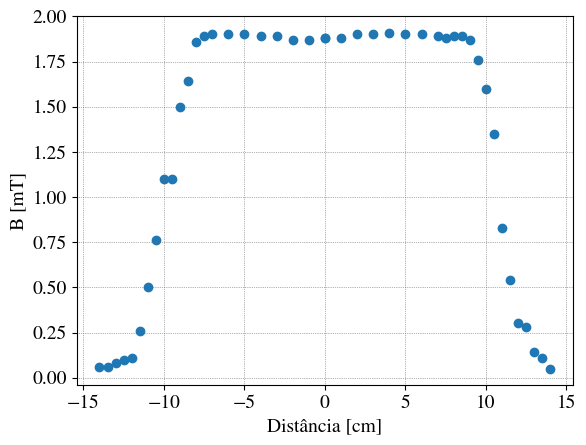

In [42]:
plt.scatter(d2,b2)
plt.xlabel('Distância [cm]')
plt.ylabel('B [mT]')
plt.grid(axis='both', color='0.40',ls=':',lw='0.5')
plt.savefig('ap00.png',bbox_inches='tight')

In [43]:
plt.close()

In [44]:
# normalizar
b_normalizado = b2/np.max(b2)
b_normalizado

array([0.98429319, 0.98429319, 0.9947644 , 0.9947644 , 1.        ,
       0.9947644 , 0.9947644 , 0.9895288 , 0.9895288 , 0.97905759,
       0.83769634, 0.43455497, 0.15706806, 0.07329843, 0.02617801,
       0.05759162, 0.14659686, 0.28272251, 0.70680628, 0.92146597,
       0.9895288 , 0.98429319, 0.98429319, 0.97905759, 0.97905759,
       0.9895288 , 0.9895288 , 0.9947644 , 0.9947644 , 0.9947644 ,
       0.9895288 , 0.97382199, 0.85863874, 0.78534031, 0.57591623,
       0.57591623, 0.39790576, 0.2617801 , 0.13612565, 0.05759162,
       0.05235602, 0.04188482, 0.03141361, 0.03141361])

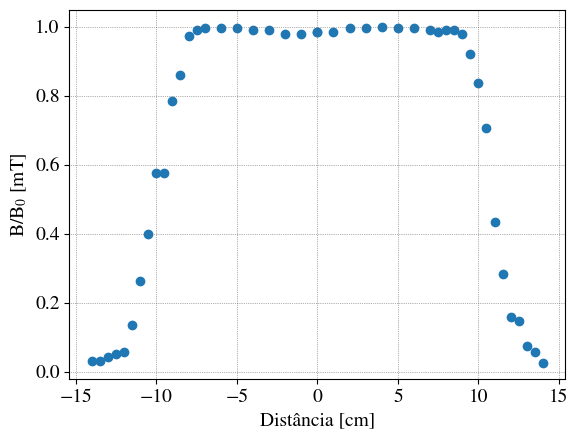

In [45]:
plt.scatter(d2,b_normalizado)
plt.xlabel('Distância [cm]')
plt.ylabel(r'B/B$_{0}$ [mT]')
plt.grid(axis='both', color='0.40',ls=':',lw='0.5')
plt.savefig('ap2.png',bbox_inches='tight')

In [46]:
plt.close()

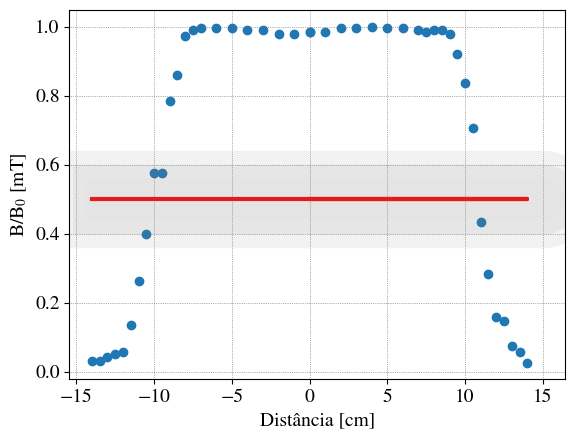

In [47]:
plt.scatter(d2,b_normalizado)
plt.xlabel('Distância [cm]')
plt.ylabel(r'B/B$_{0}$ [mT]')
plt.grid(axis='both', color='0.40',ls=':',lw='0.5')
plt.plot(d2, np.full((44, 1), 0.5),color='red',lw=3)
plt.plot(d2+1, np.full((44, 1), 0.5),color='grey',alpha=0.1,lw=70)
plt.plot(d2+1, np.full((44, 1), 0.5),color='grey',alpha=0.1,lw=50)
plt.plot(d2+1, np.full((44, 1), 0.5),color='grey',alpha=0.01,lw=30)
plt.savefig('ap2_pontosmedios.png',bbox_inches='tight')

Os pontos médios, para y = 0.5 são x = -9.75 e x = 10.75

In [48]:
10.75-(-9.75)

20.5

O valor estimado para o tamanho do solenoide é de 20.50 cm $\pm$ 0.50, quando o valor medido foi de 20.45 cm $\pm$ 0.50.

In [49]:
plt.close()